**Group information**

| Family name | First name | Student ID | Email address | UTORID |
| ----------- | ---------- | ---------- | ------------- | ------ |
|             |            |            |               |        |
|             |            |            |               |        |

# Homework 2

Consider the `housing_price` dataset. The response measures the selling price of houses and the input contains numerous house attributes (see `housing_readme.md`) of different data types. The goal of this exercise is to predict the selling price of houses based on these attributes using tree-based method, including decicion trees, random forest, and gradient boosted trees.

In [1]:
# Modules
import inspect
import numpy as np
import pandas as pd

from sklearn import ensemble, metrics, model_selection, preprocessing, tree
from matplotlib import pyplot as plt

1. Load the `housing_price` dataset available on Quercus (see `pd.read_csv`, mind the index column) and format the response as a `pd.Series`. Display descriptive statistics and compute the number of missing values for each variable.

In [2]:
# Load the target data and convert column to series 
target_data =pd.read_csv("housing_target.csv")
y = pd.Series(target_data.SalePrice)
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [3]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

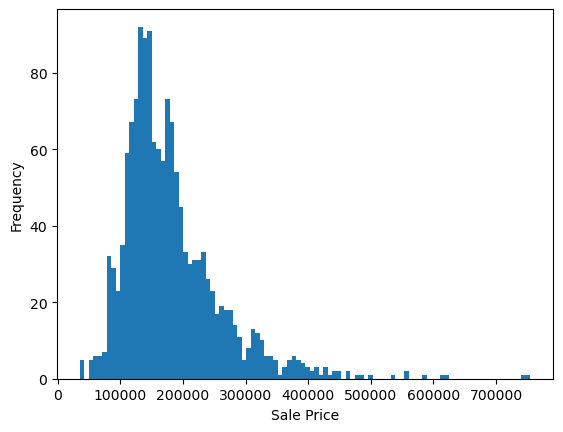

In [4]:
plt.hist(y,bins=100)
plt.xlabel("Sale Price")
plt.ylabel("Frequency");

In [5]:
# Load the X variables
housing_data = pd.read_csv("housing_data.csv")
housing_data

,id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

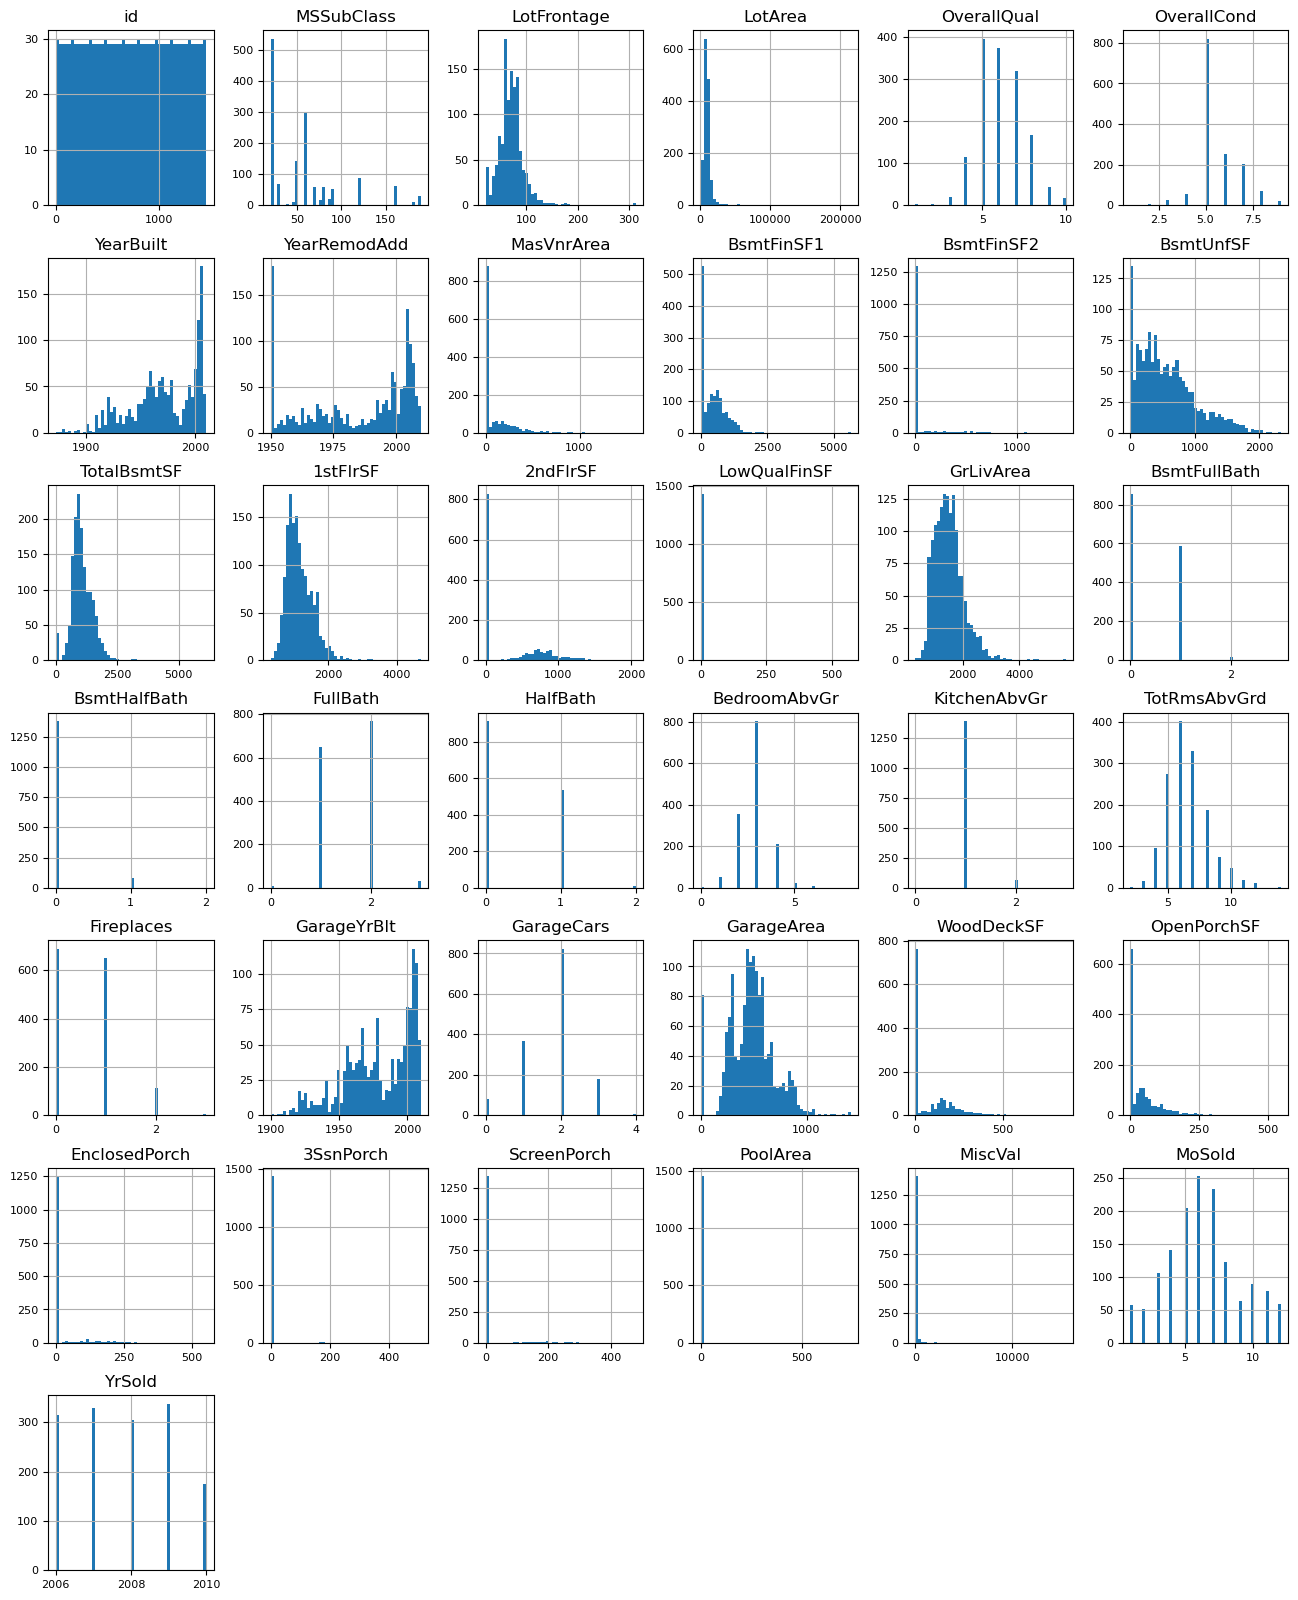

In [7]:
housing_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

2. Recode string variables and missing values using dummy variables (see `pd.get_dummies` and `pd.fillna`). Should you standardise the input data? Explain how missing values are handled by the model.

#### Discussion on Standardization

For tree-based models, standardization over the input data is **NOT necessary**. The reason being that tree moels are segmentation algos that tries to minimize the loss function by recursively segment the data to impove the homogeneity of the partitions. In other words, decision trees are **scale independent**, and thus standardization is not required. Whereas, in other models, standardization is usually required to limit the overwhelming effects from variables that take on large values. 


#### Treatment of Missing Data

For the missing data, I have categorized the missing variables into either **categorical**, or **numeric variables**.

There are 3 numeric variables contain missing values: 'LotFrontage','MasVnrArea', and'GarageYrBlt'. 

For **'LotFrontage'** I filled missing values by median values, based on the assumption that every property has some non-zero distance connecting to the street.

For **'MasVnrArea'**, I filled the missing values by 0, because it is a conditional variable (conditional on MasVnrType). If MasVnrType == None, means that the property does not have a Mansonry veneer, and therefore it makes sense to fill it with 0.

Similar with **'GarageYrBle**, it is also a conditional variable based on the whether the property has a garage. Therefore, for property does not have a garage, we filled the variable with 0. 

For the categorical variables, our group filled missing values by **'NA'**, which, in hindsight, is not necessary, since the pd.get_dummies() function can achieve that for us. 


In [8]:
# define a function that identifies variables with missing values
def get_columns_w_nan(df):
    columns_w_nan = []
    for column in df.columns:
        if df[column].isna().any():
            columns_w_nan.append(column)
    return columns_w_nan
 
columns_w_nan=get_columns_w_nan(housing_data)
columns_w_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
# num as a seperate list identified from the data descrption file
num_var = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_var = [x for x in columns_w_nan if x not in num_var]
cat_var
# Here are the categorical variables with missing values

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
# Fill NA values of numeric values by passing a dictionary

# LotFrontage being filled as median for the missing values based on the assumption that every
# property has some non-zero distance connecting to the street

# MasVnrArea is conditional on Masonry veneer type, if MasVnrType == None, then the area would be = 0
# Similarly, GarageYrBlt is also a conditional var, if the property has no garage, then GarageYrBlt== 0. 

fill_num_values = {
    'LotFrontage': housing_data['LotFrontage'].median(),
    'MasVnrArea': 0,
    'GarageYrBlt': 0
}

housing_data.fillna(value=fill_num_values, inplace=True)

In [11]:
# In hindsight, because the get_dummy function can create a seperate column for NA values, this was not necessary
housing_data[cat_var] = housing_data[cat_var].fillna('NA')

In [12]:
# housing_data after processing with no missing values
housing_data

,id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


In [13]:
# One hot encoder

# Get all columns then exclude numerical values 
housing_data_columns_list = housing_data.columns.tolist()
housing_data_columns_list.remove('id')

housing_data_columns_list

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [14]:
# Assuming columns with more than 30 unique values are numeric values, others are classified as categorical values 
# The reason being that some categorical values are already converted into number scale
# Such as MSSubClass
housing_data_num_auto =[]

for column in housing_data_columns_list:
    unique_values = housing_data[column].nunique()
    if unique_values > 30:
        housing_data_num_auto.append(column)
housing_data_num_auto

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [15]:
len(housing_data_num_auto)

18

In [16]:
#61 Categorical values 
housing_data_cate = [x for x in housing_data_columns_list if x not in housing_data_num_auto]
len(housing_data_cate)

61

In [17]:
# Subset the numeric variable 
num_df = housing_data[housing_data_num_auto]
num_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,1647,1999.0,460,0,40,0,0
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,2073,1978.0,500,349,0,0,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,2340,1941.0,252,0,60,0,0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1950.0,240,366,0,112,0


In [18]:
# Get dummies for the rest of the vars
cate_df = pd.get_dummies(housing_data[housing_data_cate],drop_first=True)
cate_df

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,0,1,0,2,1,3,1,...,0,0,0,0,1,0,0,0,1,0
1,20,6,8,0,0,1,2,0,3,1,...,0,0,0,0,1,0,0,0,1,0
2,60,7,5,0,1,0,2,1,3,1,...,0,0,0,0,1,0,0,0,1,0
3,70,7,5,0,1,0,1,0,3,1,...,0,0,0,0,1,0,0,0,0,0
4,60,8,5,0,1,0,2,1,4,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,...,0,0,0,0,1,0,0,0,1,0
1456,20,6,6,0,1,0,2,0,3,1,...,0,0,0,0,1,0,0,0,1,0
1457,70,7,9,0,0,0,2,0,4,1,...,0,0,0,0,1,0,0,0,1,0
1458,20,5,6,0,1,0,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0


In [19]:
# Combining num df with encoded categorical variables to get the data ready for use
processed_data= cate_df.merge(num_df,left_index=True,right_index=True)
processed_data

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,60,7,5,0,1,0,2,1,3,1,...,856,856,854,1710,2003.0,548,0,61,0,0
1,20,6,8,0,0,1,2,0,3,1,...,1262,1262,0,1262,1976.0,460,298,0,0,0
2,60,7,5,0,1,0,2,1,3,1,...,920,920,866,1786,2001.0,608,0,42,0,0
3,70,7,5,0,1,0,1,0,3,1,...,756,961,756,1717,1998.0,642,0,35,272,0
4,60,8,5,0,1,0,2,1,4,1,...,1145,1145,1053,2198,2000.0,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,...,953,953,694,1647,1999.0,460,0,40,0,0
1456,20,6,6,0,1,0,2,0,3,1,...,1542,2073,0,2073,1978.0,500,349,0,0,0
1457,70,7,9,0,0,0,2,0,4,1,...,1152,1188,1152,2340,1941.0,252,0,60,0,0
1458,20,5,6,0,1,0,1,0,2,1,...,1078,1078,0,1078,1950.0,240,366,0,112,0


3. Randomly split the observations into a training sample (75%) and a test sample (25%). Fit a decision tree model that minimises the squared error to the training sample.

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(processed_data, y, train_size=0.75, shuffle=True, random_state=1)

In [21]:
y_test

258     231500
267     179500
288     122000
649      84500
1233    142000
         ...  
1017    187500
534     178000
1334    125000
1369    232000
628     135000
Name: SalePrice, Length: 365, dtype: int64

In [22]:
# Create and fit a DecisionTree Regressor model instance on the train data to min sqared error, as default
model = tree.DecisionTreeRegressor(random_state=1, criterion="squared_error")
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

4. Compute the predictive performance on the training and the test sample (see `sklearn.tree`) and comment on the results. Inspect the arguments of the model (see `inspect.signature`) and propose 3 different ways to improve the generalisation performance of the tree model.

#### Comment on The Results

The below codes print the taining and testing performance of the individual tree. The default score for the DecisionTreeRegression is R^2. The higher the better. The **training R^2 = 1** and the **test R^2 = 0.69**. There is a significant drop between the train and test score, which indicate that the model is likely **overfitted**. This is expected, since decision trees, without any regularization, is very likely to overfit by fitting perfectly to the training set. 

#### Ways to Improve

Using the inspect.signature function, we can figure out the methods that can be used to improve the generalization performance of the model, or ways to avoid overfitting. 

- **max_features:**
     This method restricts the number of features to consider ateach split.

- **max_depth:**
    This method restricts the maximum depth of the tree. 
    
- **min_impurity_decrease:**
    This mehod will restrict on how the nodes will be splited. A node will split if the decrease of the impurity is greater or equal to this value.  

In [23]:
# Training and test accuracy
print(f'Training score: {model.score(X_train, y_train):0.2f}')
print(f'Test score:     {model.score(X_test, y_test):0.2f}')

# The model.score by default returns R^2 for regressor.
# training accuracy is 1 and the test accuracy is 0.69. 
# The difference between training and test accuracy suggest overfit of the model.
# The result is expected, since tree-based models are extremely likely to overfit, especially without any regularization techniques.

Training score: 1.00
Test score:     0.69


In [24]:
from sklearn.tree import DecisionTreeRegressor
signature =inspect.signature(DecisionTreeRegressor)
signature

<Signature (*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)>

5. Fit a random forest model with 25 trees to the training data (see `sklearn.ensemble`) and compute the predictive performance on both samples. How does it compare to the performance of the tree model? Explain why.

#### Comment on The Performance

In this section, the default score-- R^2, MSE, and MAPE was calculated to evaluate the performance of a random forest model on both the training and testing data.  

The **training R^2 = 0.97**
The **test R^2 = 0.87**


The **training MAPE = 4%**
The **test MAPE = 10%**

From the above results, the drop in test score is considered to be acceptable, meaning that overfit is less of a concern for random forest model. 

Comparing to the performance of the tree model, the training score decresed from 1 to 0.97, while the test score improved significantly from 0.69 to 0.90. The random forest model sacrificed some performance on the training set, but greatly improved the generalization performance. This result is expected, as it resticts the model's ability to capture the unnecessary noise from the training data.


In [25]:
# Fit an instance of the random forest model using RandomForestRegressor class
rf_model = ensemble.RandomForestRegressor(n_estimators=25,oob_score=True,random_state=1)
rf_model.fit(X_train, y_train)

rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Default score = R^2
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

# MSE on the train and test data
rf_train_mse = metrics.mean_squared_error(y_train, rf_train_predictions)
rf_test_mse = metrics.mean_squared_error(y_test, rf_test_predictions)

# MAPE on the train and test data
rf_train_mape = metrics.mean_absolute_percentage_error(y_train, rf_train_predictions)
rf_test_mape = metrics.mean_absolute_percentage_error(y_test, rf_test_predictions)

In [26]:
# By comparing the model scrore, by default is R^2, the RF model loses some training performance, from 0.97 to 0.9, 
# but improved the test performance significantly, from 0.69 to 0.9. 
# However; given the difference between train and test performance, the model still might be subject to overfit.

In [27]:
rf_train_score

0.9733828901732664

In [28]:
rf_test_score

0.8788216444286747

In [29]:
rf_train_mse

164054153.8096687

In [30]:
rf_test_mse

813497934.2597262

In [31]:
rf_train_mape

0.04099686733280956

In [32]:
rf_test_mape

0.10243881586125168

6. Compute the out-of-bag score (see the `oob_score` parameter of the model) and explain how this estimate compares to the test score.

#### OOB Score vs. Test Score

The OOB score of the random forest model is **0.80**, and the test score is **0.87**. For each tree in random forest, OOB is the observations not used during training (not selected in the bootstrap process), and these obs are used as test sample to compute the generalization error for each tree. The OOB score is computed as the number of correctly predicted from the out-of-bag sample. Whereas, test score is derived using the test dataset, which is a separate dataset held back and not used during training or model selection phase. 

In [33]:
# Compute the OOB score
oob_score = rf_model.oob_score_
oob_score

0.8046447225170422

In [34]:
# Provide a comparison and explaination to the OOB score and test score

7. Explain how we can estimate variable importance when using tree-based models and compute these estimates (see `feature_importances_` method) and identify the 10 most important variables. How do you expect correlation among input variables to affect these estimates?

Variable importance is computed based on Gini importance, which considers the total reduction in impurity across all tress, so the importance of the feature within the overall model can be determined. 

The top 10 most impotant variables are shown in the following dataframe. Further, since impurity-based feature importances may not perform as well for high cardinality features, the permutation_importance was also computed, which is shown in the second dataframe below. 

Correlation among input variables are similar to multicollineaity in Econometrics, where the importance of a single variable might be mixed up, or contain effects of other variables that are correlated to both the output variable (y) and the input variables (x). Therefore, the estimates are no longer accurate, since the importance is a mixture of the importance of the input variable itself, and importance other variables that are correlated to the input variable. 

In [35]:
# Obtain the random forest feature importance using the feature_improtances_ attribute
# This computes the impurity-based feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Put the importance values and names into dataframe and sort from high to low
features_dict = {"Feature":feature_names,"Importance":importances}
feature_importances =pd.DataFrame(data=features_dict)
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.head(10)

,Feature,Importance
1,OverallQual,0.561757
254,GrLivArea,0.104674
251,TotalBsmtSF,0.040145
252,1stFlrSF,0.032024
248,BsmtFinSF1,0.031310
12,GarageCars,0.020768
244,LotArea,0.019933
253,2ndFlrSF,0.018316
10,TotRmsAbvGrd,0.015568
256,GarageArea,0.014200


In [36]:
# Also compute the permutation_importance, since impurity-based feature importances are not robust for high cardinality features
from sklearn.inspection import permutation_importance
premutation_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10,random_state=1)

In [37]:
# Create a dataframe
perm_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': premutation_importance.importances_mean,
    'importance_std': premutation_importance.importances_std
})

# Sort the dataframe by importance_mean in descending order
perm_importance_df = perm_importance_df.sort_values(by='importance_mean', ascending=False)
perm_importance_df[:10]

,feature,importance_mean,importance_std
1,OverallQual,0.451284,0.030295
254,GrLivArea,0.124022,0.011381
253,2ndFlrSF,0.036168,0.001478
251,TotalBsmtSF,0.025705,0.002755
248,BsmtFinSF1,0.016508,0.001881
256,GarageArea,0.008580,0.002232
244,LotArea,0.008386,0.001970
12,GarageCars,0.007484,0.001244
247,MasVnrArea,0.006850,0.000615
2,OverallCond,0.006077,0.001282


8. Optimise the tuning parameters `n_estimators` and `max_features` of the model using grid-search 5-fold cross-validation (see `model_selection.GridSearchCV`), and find a combination of parameters that improves on question 5 (see the `best_params_` and `best_score_` methods).

The below codes show the best parameters for both the n_estimators and max_featues.

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5,scoring='r2')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 75}
Best Score: 0.8292842707760186


In [39]:
grid_search_test_score = grid_search.score(X_test, y_test)
grid_search_test_score

0.869189311638989

9. Explain the advantage of gradient boosting over individual tree. Fit a gradient boosting model with 100 trees to the training data. How does the generalisation performance compare to the decision tree and the random forest models?

Gradient boosting is a method under ensemble, which fits trees sequentially, as opposed to 1 individual tree. The idea behind gradient bossting models is to start with high bias and variance models, then through sequantial fitting, reduce the bias of the boosted model. In each iteration, the base model in the current iteration is fitted on the residuals of the previous model. The fitted based model are aggregated to the previous boosted model to form the boosted model in the current iteration, and the process repeats. 


Therefore, comparing to individual trees, **gradient bossting progressively reduces bias by estimating a sequence of low variance trees**.

The below codes show the train and test perofrmance of the gradient bossting models with 100 trees. 

Based on the result, we can rank the generalization performance of these 3 models:

**Gradient Boosting > Random Forest > Tree**  

In [40]:
# Create a Gradient Boosting classifier with 100 trees
gb_model = ensemble.GradientBoostingRegressor(n_estimators=100)

# Fit the model on the training data
gb_model.fit(X_train, y_train)


gb_train_predictions = gb_model.predict(X_train)
gb_test_predictions = gb_model.predict(X_test)

# Default R^2 score
gb_train_score = gb_model.score(X_train, y_train)
gb_test_score = gb_model.score(X_test, y_test)

# MSE on the train and test data
gb_train_mse = metrics.mean_squared_error(y_train, gb_train_predictions)
gb_test_mse = metrics.mean_squared_error(y_test, gb_test_predictions)

# MAPE on the train and test data
gb_train_mape = metrics.mean_absolute_percentage_error(y_train, gb_train_predictions)
gb_test_mape = metrics.mean_absolute_percentage_error(y_test, gb_test_predictions)

In [41]:
gb_train_score

0.965970507063845

In [42]:
gb_test_score

0.9202578219297778

10. Plot the evolution of the training and test scores with each boosting iteration. Show the impact of increasing (e.g. 0.5) or decreasing (e.g. 0.01) the model's learning rate on the optimisation path.


The below codes and plots show the evolution of the training and test scores with each boosting iterations. Across all 3 learning rates, it is expected that the train performance is better than the test performance. Futher, all else equal, learning rate = 0.01 is too slow for the model to update, and as shown in the below chart, the MSE did not converge like the other 2 models with a higher learning rate. In addition, learning rate = 0.5 as the # of iterations increases, the difference between train and test perofrmance becomes larger, whereas the difference between train and test performance is quite steady for the model with learning rate = 0.1.

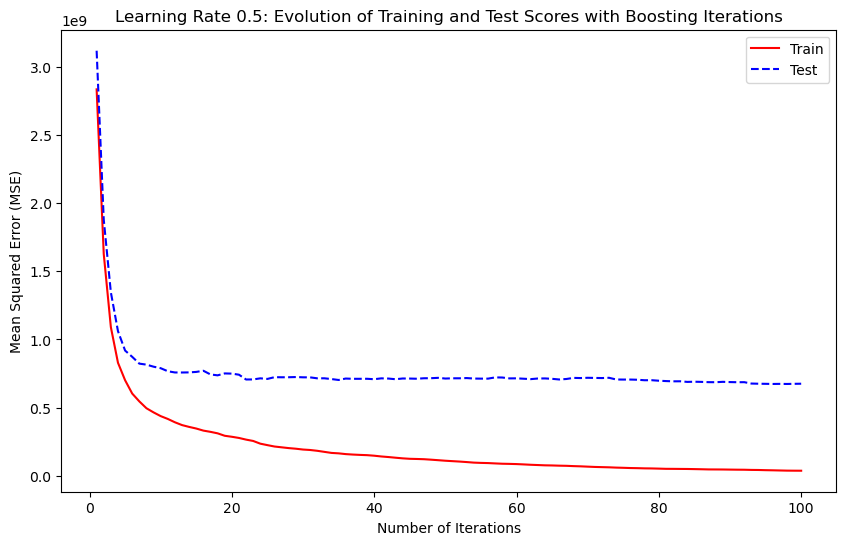

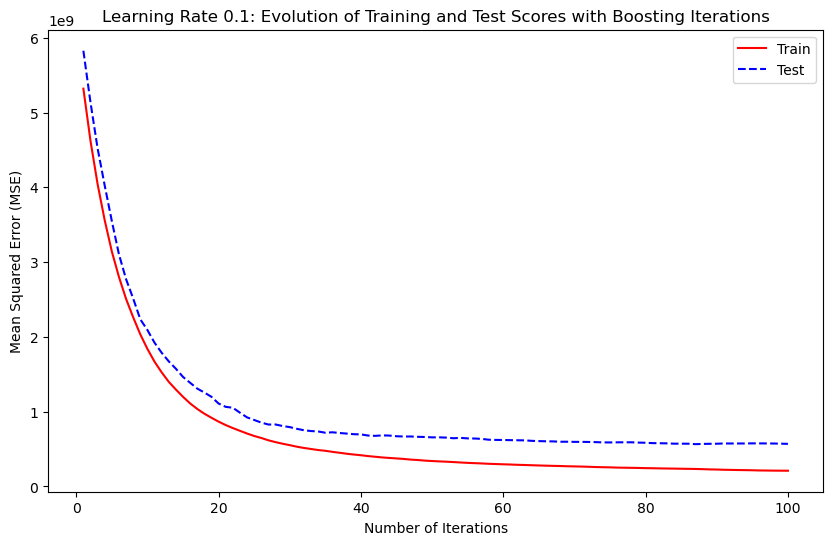

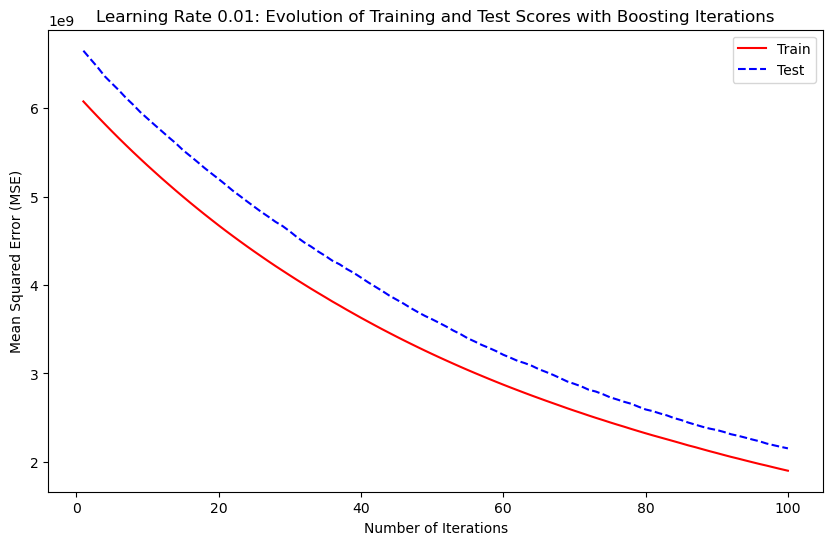

In [43]:
learning_rates = [0.5, 0.1, 0.01]

# Iterate over different learning rates
for lr in learning_rates:
    # Create a new Gradient Boosting model with the specified learning rate
    gb_model_lr = ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=lr)
    gb_model_lr.fit(X_train, y_train)
    
    # Initialize lists to store training and test scores
    train_scores = []
    test_scores = []
    
    # Compute training and test scores for each boosting iteration
    for i, y_pred in enumerate(gb_model_lr.staged_predict(X_train)):
        train_scores.append(metrics.mean_squared_error(y_train, y_pred))
    
    for i, y_pred in enumerate(gb_model_lr.staged_predict(X_test)):
        test_scores.append(metrics.mean_squared_error(y_test, y_pred))
    
    # Visualize the result
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.arange(1, gb_model_lr.n_estimators + 1), train_scores, color='red', label='Train')
    ax.plot(np.arange(1, gb_model_lr.n_estimators + 1), test_scores, color='blue', linestyle='--', label='Test')
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Mean Squared Error (MSE)')
    ax.set_title(f'Learning Rate {lr}: Evolution of Training and Test Scores with Boosting Iterations')
    ax.legend()
    plt.show()